Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


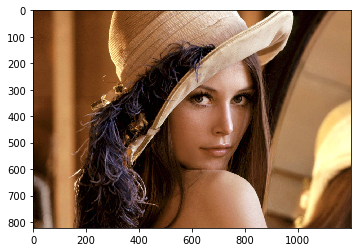

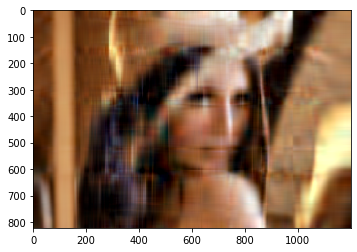

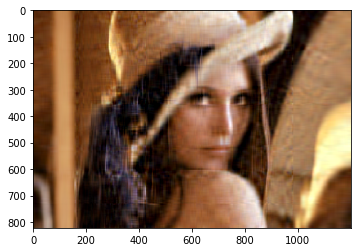

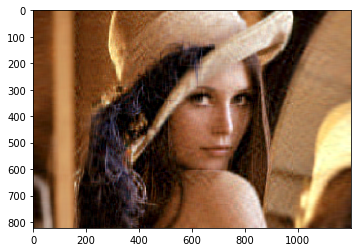

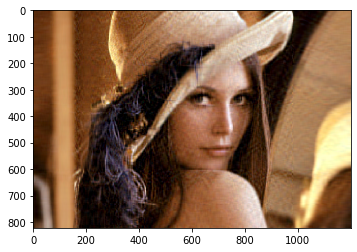

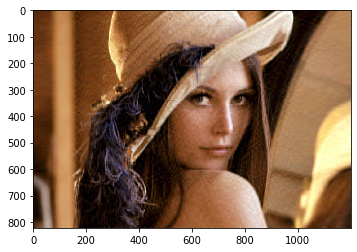

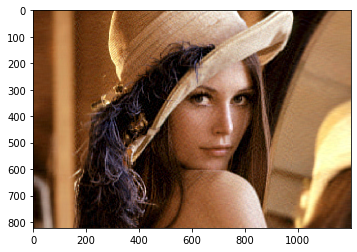

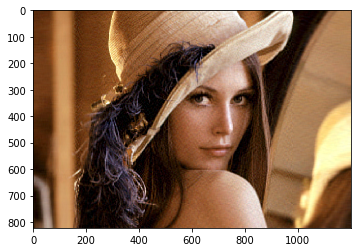

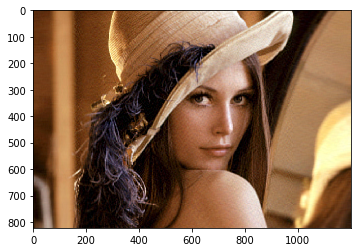

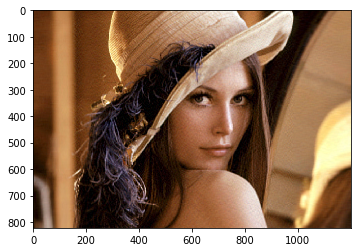

<Figure size 432x288 with 0 Axes>

In [258]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.ndimage import rotate


img = plt.imread("lena.jpg")/255

plt.imshow(img)
plt.figure()
compressed = np.zeros(img.shape)

for n in range(10,100,10):
    compressed = np.zeros(img.shape)
    for i in range(3):
        pca = PCA(n)
        U = pca.fit_transform(img[:,:,i])
        compressed[:,:,i] = np.dot(U, pca.components_) + pca.mean_
    plt.imshow(compressed)
    plt.figure()

##### I tried making my own PCA but i dont know what's wrong. I cant figure out what pca.fit_transform(img[:,:,i]) returns. This is the only thing I dont understand, but if I could then I would have been able make my own.

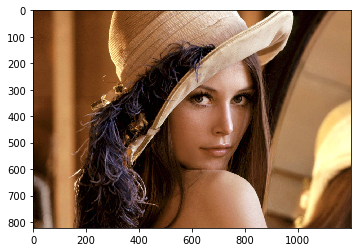

<Figure size 432x288 with 0 Axes>

In [252]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

def PCA(X, components):
    X_mean = X - np.mean(X, axis = 0)
    cov = np.cov(X_mean, rowvar = False)
    
    eigValues, eigVectors = np.linalg.eigh(cov)

    sortedIndex = np.argsort(eigValues)[::-1]
    sortedEigValues = eigValues[sortedIndex]
    sortedEigVectors = eigVectors[:,sortedIndex]
    
    fewEigVectors = sortedEigVectors[:,:components]  # selects the n first vectors column-vise
    
    N,M = X.shape
    imgNew = np.zeros([N,M,components])
    
    for r in range(components):
        for x in range(X.shape[0]):
                                    # X[x] is wrong here but I dont know what to replace it with
            imgNew[x,:,r] = X_mean[x] + np.dot(X[x], fewEigVectors[:,r].T) 
        
    return imgNew



img = plt.imread("lena.jpg")

plt.imshow(img)
plt.figure()
img = img/255
imgRed = PCA(img[:,:,0],100)


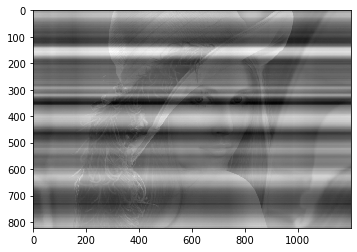

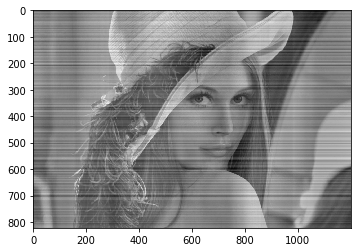

In [254]:
plt.imshow(imgRed[:,:,10], cmap="gray")
plt.figure()
plt.imshow(imgRed[:,:,99], cmap="gray")



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

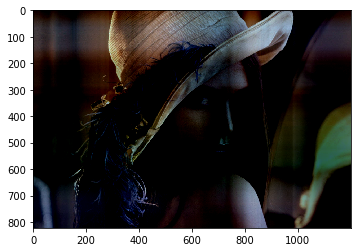

<Figure size 432x288 with 0 Axes>

In [135]:
colorImg = np.zeros(imgRed.shape)
colorImg[:,:,0] = imgRed[:,:,0]
colorImg[:,:,1] = imgBlue[:,:,0]
colorImg[:,:,2] = imgGreen[:,:,0]

plt.imshow(colorImg)
plt.figure()

